# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name # ????
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
totalCities = len(cities)
print(totalCities)

625


In [15]:
# print randomized city list
print(cities)

['ribeira grande', 'faya', 'qaanaaq', 'hermanus', 'mahina', 'grindavik', 'lypnyazhka', 'klaksvik', 'port alfred', 'albany', 'airai', 'kapaa', 'grand river south east', 'jamestown', 'atuona', 'alakurtti', 'severo-kurilsk', 'trelew', 'price', 'mujiayingzi', 'bethel', 'rikitea', 'mataura', 'saint-philippe', 'yatou', 'ushuaia', 'vitim', 'pangoa', 'dikson', 'bredasdorp', 'san cristobal', 'tasiilaq', 'port elizabeth', 'taolanaro', 'mbini', 'bababe', 'leshukonskoye', 'kruisfontein', 'lufilufi', 'bahia blanca', 'ambarawa', 'busselton', 'manavalakurichi', 'ilulissat', 'avarua', 'longyearbyen', 'esso', 'altay', 'san ignacio', 'maryville', 'provideniya', 'mandalgovi', 'changli', 'tuktoyaktuk', 'sitka', 'puerto ayora', 'san luis', 'grand gaube', 'upernavik', 'feicheng', 'saryshagan', 'pak phanang', 'hithadhoo', 'marsabit', 'charagua', 'nalut', 'alingsas', 'boundiali', 'bluff', 'hastings', 'chokurdakh', 'katsuura', 'torbat-e jam', 'husavik', 'wuwei', 'arlit', 'zyryanka', 'berlevag', 'mar del plata'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# assign a unit of measure
units = "imperial"

# create lists
lat = []
lng = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []
cityList = [] # why would i need another list?

# Build query URL
query_url = f" {url}appid={weather_api_key}&q="
print(query_url)       

 http://api.openweathermap.org/data/2.5/weather?appid=39e616bcf30fc5c61cdd3d129f43f839&q=


In [17]:
# look up a city manually to see structure of indeces
f" {url}appid={weather_api_key}&q=isla%20mujeres&units={units}"

' http://api.openweathermap.org/data/2.5/weather?appid=39e616bcf30fc5c61cdd3d129f43f839&q=isla%20mujeres&units=imperial'

In [18]:
# define count for keeping track of each city
count = 1

# create loop to grab info and put into above lists
for city in cities:
#    
    try:
        response = requests.get(query_url + city + "&units=" + units).json()
        cityID = response['id']
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cityList.append(city)
        print(f"Processing {count} of {totalCities} | city:{city}; id:{cityID}")
        count = count+1
    except:
        print(f"City not found. Skipping...")
   

print("--------------------------")
print(f"Data Retrieval Complete")
print("--------------------------")


Processing 1 of 625 | city:ribeira grande; id:3372707
Processing 2 of 625 | city:faya; id:110690
Processing 3 of 625 | city:qaanaaq; id:3831208
Processing 4 of 625 | city:hermanus; id:3366880
Processing 5 of 625 | city:mahina; id:4034307
Processing 6 of 625 | city:grindavik; id:3416888
Processing 7 of 625 | city:lypnyazhka; id:703017
Processing 8 of 625 | city:klaksvik; id:2618795
Processing 9 of 625 | city:port alfred; id:964432
Processing 10 of 625 | city:albany; id:5106841
Processing 11 of 625 | city:airai; id:1651810
Processing 12 of 625 | city:kapaa; id:5848280
City not found. Skipping...
Processing 13 of 625 | city:jamestown; id:5122534
Processing 14 of 625 | city:atuona; id:4020109
Processing 15 of 625 | city:alakurtti; id:583472
Processing 16 of 625 | city:severo-kurilsk; id:2121385
Processing 17 of 625 | city:trelew; id:3833883
Processing 18 of 625 | city:price; id:5545269
Processing 19 of 625 | city:mujiayingzi; id:2035707
Processing 20 of 625 | city:bethel; id:5282297
Proces

Processing 160 of 625 | city:baker city; id:5712169
Processing 161 of 625 | city:khasan; id:2039557
Processing 162 of 625 | city:amapa; id:3407762
Processing 163 of 625 | city:esperance; id:2071860
Processing 164 of 625 | city:tigil; id:2120612
Processing 165 of 625 | city:cherskiy; id:2126199
City not found. Skipping...
City not found. Skipping...
Processing 166 of 625 | city:akcakoca; id:752584
Processing 167 of 625 | city:saskylakh; id:2017155
Processing 168 of 625 | city:carnarvon; id:2074865
Processing 169 of 625 | city:nuuk; id:3421319
Processing 170 of 625 | city:langres; id:3007679
Processing 171 of 625 | city:puerto madryn; id:3840092
Processing 172 of 625 | city:medicine hat; id:6071618
Processing 173 of 625 | city:turukhansk; id:1488903
Processing 174 of 625 | city:hirara; id:1862505
Processing 175 of 625 | city:belaya gora; id:2126785
Processing 176 of 625 | city:penzance; id:2640377
Processing 177 of 625 | city:sao raimundo nonato; id:3388145
Processing 178 of 625 | city:t

Processing 318 of 625 | city:catamayo; id:3659599
Processing 319 of 625 | city:caceres; id:2520610
City not found. Skipping...
Processing 320 of 625 | city:troitskoye; id:1489209
Processing 321 of 625 | city:pecos; id:5528182
Processing 322 of 625 | city:taksimo; id:2015701
City not found. Skipping...
Processing 323 of 625 | city:sept-iles; id:6144312
Processing 324 of 625 | city:lavrentiya; id:4031637
Processing 325 of 625 | city:kulhudhuffushi; id:1337613
Processing 326 of 625 | city:west wendover; id:5710035
Processing 327 of 625 | city:la palma; id:5364022
Processing 328 of 625 | city:naze; id:1855540
Processing 329 of 625 | city:harrismith; id:997751
Processing 330 of 625 | city:oktyabrskoye; id:515805
Processing 331 of 625 | city:batsfjord; id:780717
City not found. Skipping...
Processing 332 of 625 | city:hereford; id:2647074
Processing 333 of 625 | city:zyukayka; id:461756
Processing 334 of 625 | city:dwarka; id:1272140
Processing 335 of 625 | city:rawson; id:3839307
Processing

Processing 473 of 625 | city:oistins; id:3373652
Processing 474 of 625 | city:saint-leu; id:6690297
Processing 475 of 625 | city:zelenoborsk; id:1485286
Processing 476 of 625 | city:bela; id:1276574
Processing 477 of 625 | city:brigantine; id:4500920
Processing 478 of 625 | city:tabou; id:2281120
Processing 479 of 625 | city:lamar; id:4705086
Processing 480 of 625 | city:coihaique; id:3894426
Processing 481 of 625 | city:sasykoli; id:498437
Processing 482 of 625 | city:nezhinka; id:522312
Processing 483 of 625 | city:miandrivazo; id:1059051
Processing 484 of 625 | city:luderitz; id:3355672
Processing 485 of 625 | city:cururupu; id:3401148
Processing 486 of 625 | city:grand-santi; id:3381538
Processing 487 of 625 | city:peachland; id:6100086
Processing 488 of 625 | city:san quintin; id:3984997
Processing 489 of 625 | city:jatiroto; id:1642692
City not found. Skipping...
Processing 490 of 625 | city:bilecik; id:321122
Processing 491 of 625 | city:la rioja; id:3336897
Processing 492 of 62

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weatherDict = {"City": cityList,
                           "Lat": lat,
                           "Lng": lng,
                           "Max Temp": maxTemp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": windSpeed,
                           "Country": country,
                           "Date": date}

weather_df = pd.DataFrame(weatherDict)

weather_df.to_csv(output_data_file)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.52,-28.70,62.60,72,40,8.05,PT,1592169751
1,faya,18.39,42.45,75.20,46,97,1.12,SA,1592169751
2,qaanaaq,77.48,-69.36,41.83,69,0,5.88,GL,1592169751
3,hermanus,-34.42,19.23,52.00,96,89,1.07,ZA,1592169751
4,mahina,-17.51,-149.49,84.20,66,20,4.70,PF,1592169751
...,...,...,...,...,...,...,...,...,...
566,rio gallegos,-51.62,-69.22,39.20,86,90,5.82,AR,1592169776
567,roma,43.21,-75.46,64.99,45,90,3.36,US,1592169776
568,rundu,-17.93,19.77,52.99,44,0,4.99,NA,1592169776
569,bairiki,1.33,172.98,84.20,70,20,5.82,KI,1592169776


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#  Get the indices of cities that have humidity over 100%.
weather_df
humidityFilter  = weather_df[weather_df['Humidity'] > 100].count()
# print(g989Dup.index) 
print(humidityFilter)
print()
print(humidityFilter.index)

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

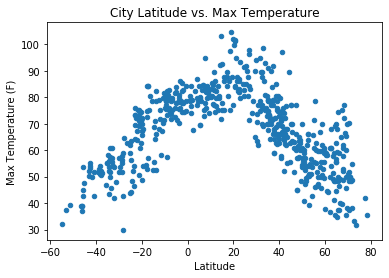

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# grab columns needed
latTemp = weather_df[["Lat", "Max Temp"]]
latTemp

# # rename columns for a different labels
latTemp = latTemp.rename(columns={"Lat": "Latitude", "Max Temp": "Max Temperature (F)"})
latTemp

# # create plot
latTemp.plot(kind="scatter",x="Latitude", y="Max Temperature (F)", title="City Latitude vs. Max Temperature") 
plt.savefig("../output_data/Fig1.png")

This code is taking the latitude and mapping where the max temp lies.  The equator is at 0 latitude.  It seems that that there is a relationship between latitude and max temp. Highest max temps are between -20 and 20 latitude and temps get cooler as you get further away.  There are some outliers in the northern hemisphere.

## Latitude vs. Humidity Plot

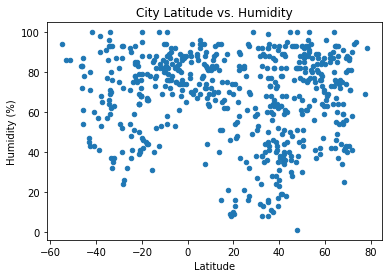

In [26]:
# grab columns needed
latHum = weather_df[["Lat", "Humidity"]]
latHum

# # rename columns for a different labels
latHum = latHum.rename(columns={"Lat": "Latitude", "Humidity": "Humidity (%)"})
latHum

# # create plot
latHum.plot(kind="scatter",x="Latitude", y="Humidity (%)", title="City Latitude vs. Humidity")
plt.savefig("../output_data/Fig2.png")

This plot shows humidity relative to the equator.  There does not seem to be a relationship here.

## Latitude vs. Cloudiness Plot

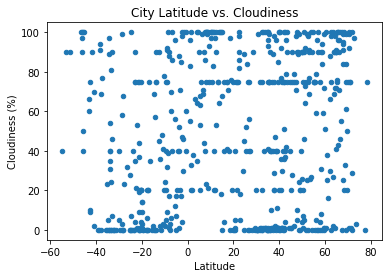

In [27]:
# grab columns needed
latCloud = weather_df[["Lat", "Cloudiness"]]
latCloud

# # rename columns for a different labels
latCloud = latCloud.rename(columns={"Lat": "Latitude", "Cloudiness": "Cloudiness (%)"})
latCloud

# # create plot
latCloud.plot(kind="scatter",x="Latitude", y="Cloudiness (%)", title="City Latitude vs. Cloudiness") 
plt.savefig("../output_data/Fig3.png")

This plot shows cloudiness relative to the equator.  There does not seem to be a relationsip between the two factors.

## Latitude vs. Wind Speed Plot

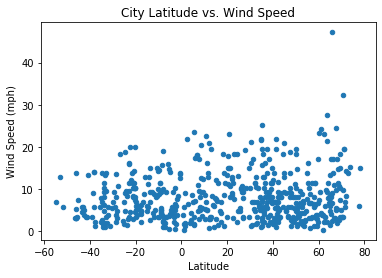

In [30]:
# grab columns needed
latWind = weather_df[["Lat", "Wind Speed"]]
latWind

# # rename columns for a different labels
latWind = latWind.rename(columns={"Lat": "Latitude", "Wind Speed": "Wind Speed (mph)"})
latWind

# # create plot
latWind.plot(kind="scatter",x="Latitude", y="Wind Speed (mph)", title="City Latitude vs. Wind Speed") 
plt.savefig("../output_data/Fig4.png")

This plot shows the relationship between wind speed and distance from the equator.  There seems to be no relationship.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [31]:
# Create Northern and Southern Hemisphere DataFrames
nHemi = weather_df[weather_df['Lat'] > 0]
nHemi

sHemi = weather_df[weather_df['Lat'] < 0]
sHemi


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,hermanus,-34.42,19.23,52.00,96,89,1.07,ZA,1592169751
4,mahina,-17.51,-149.49,84.20,66,20,4.70,PF,1592169751
8,port alfred,-33.59,26.89,55.99,80,24,1.01,ZA,1592169751
10,airai,-8.93,125.41,57.42,100,9,4.23,TL,1592169751
13,atuona,-9.80,-139.03,80.44,73,24,14.58,PF,1592169277
...,...,...,...,...,...,...,...,...,...
557,pringsewu,-5.36,104.97,72.59,92,56,0.47,ID,1592169775
563,itarema,-2.92,-39.92,78.76,80,17,10.16,BR,1592169534
564,colac,-38.33,143.58,51.01,98,94,14.03,AU,1592169776
566,rio gallegos,-51.62,-69.22,39.20,86,90,5.82,AR,1592169776


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5793289539516349


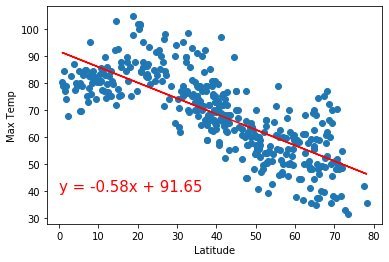

In [40]:
# grab columns needed
nLatTemp = nHemi[["Lat", "Max Temp"]]
nLatTemp

nLat = nHemi["Lat"]
nMaxTemp = nHemi["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nLat, nMaxTemp)
regressValues = nLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nLat, nMaxTemp)
plt.plot(nLat,regressValues,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This plot shows a moderately strong negative correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6950655505023627


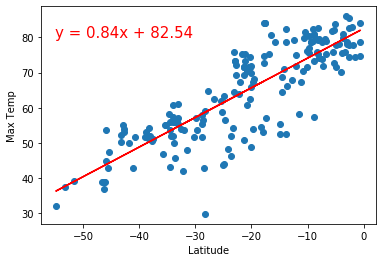

In [33]:
sLatTemp = sHemi[["Lat", "Max Temp"]]
sLatTemp

sLat = sHemi["Lat"]
sMaxTemp = sHemi["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sLat, sMaxTemp)
regressValues = sLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sLat, sMaxTemp)
plt.plot(sLat,regressValues,"r-")
plt.annotate(line_eq,(-55, 80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is a moderately strong positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0007278948099811211


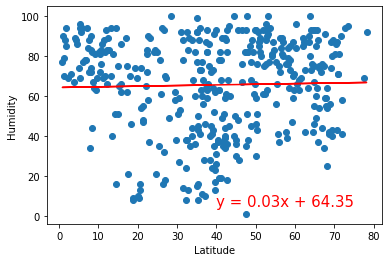

In [34]:
# grab columns needed
nLatHum = nHemi[["Lat", "Humidity"]]
nLatHum

nLat = nHemi["Lat"]
nHumidity = nHemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nLat, nHumidity)
regressValues = nLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nLat, nHumidity)
plt.plot(nLat,regressValues,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is no correlation.  Slope is close to 0.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027890524636222595


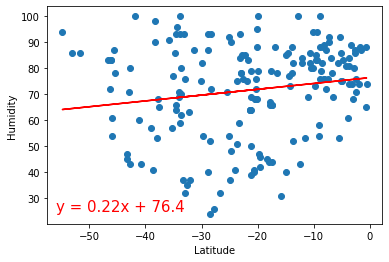

In [35]:
# grab columns needed
sLatHum = sHemi[["Lat", "Humidity"]]
sLatHum

sLat = sHemi["Lat"]
sHumidity = sHemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sLat, sHumidity)
regressValues = sLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sLat, sHumidity)
plt.plot(sLat,regressValues,"r-")
plt.annotate(line_eq,(-56,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The positive correlation is very slight.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0003256681815971458


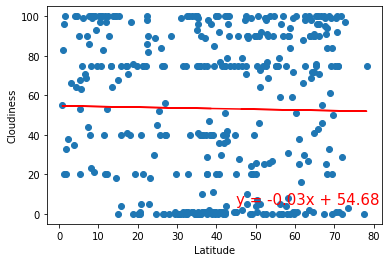

In [36]:
# grab columns needed
nLatCloud = nHemi[["Lat", "Cloudiness"]]
nLatCloud

nLat = nHemi["Lat"]
nCloudiness = nHemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nLat, nCloudiness)
regressValues = nLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nLat, nCloudiness)
plt.plot(nLat,regressValues,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is no correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0020485201670015366


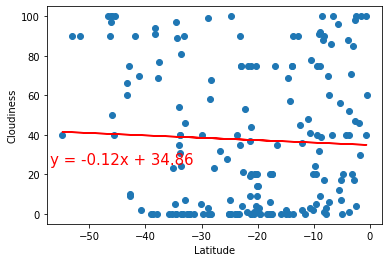

In [37]:
# grab columns needed
sLatCloud = sHemi[["Lat", "Cloudiness"]]
sLatCloud 

sLat = sHemi["Lat"]
sCloudiness = sHemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sLat, sCloudiness)
regressValues = sLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sLat, sCloudiness)
plt.plot(sLat,regressValues,"r-")
plt.annotate(line_eq,(-57,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The negative correlation is very slight.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0003623691403863199


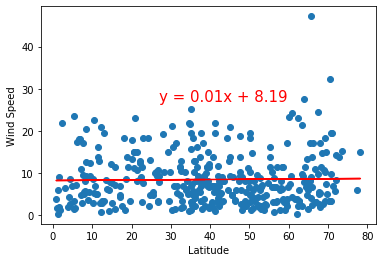

In [38]:
# grab columns needed
nLatWind = nHemi[["Lat", "Wind Speed"]]
nLatWind

nLat = nHemi["Lat"]
nWindSpeed = nHemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nLat, nWindSpeed)
regressValues = nLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nLat, nWindSpeed)
plt.plot(nLat,regressValues,"r-")
plt.annotate(line_eq,(27,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is no correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0037105308989203844


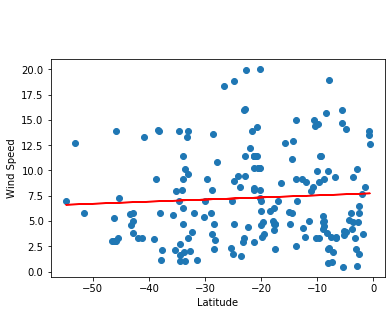

In [39]:
# grab columns needed
sLatWind = sHemi[["Lat", "Wind Speed"]]
sLatWind

sLat = sHemi["Lat"]
sWindSpeed = sHemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sLat, sWindSpeed)
regressValues = sLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sLat, sWindSpeed)
plt.plot(sLat,regressValues,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is a very slight positive correlation.